### Проект 3 [Медицинские расходы]

Вам предоставляется набор данных, содержащий информацию о медицинских расходах. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования **медицинских расходов** (```"charges"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.


**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test.csv```.

In [1]:
# загрузка модуля и загрузка тренировочных данных
import pandas as pd
import numpy as np
data_train=pd.read_csv("train.csv")
data_train.head()

,age,sex,bmi,children,smoker,region,charges
0,34,male,42.900,1,no,southwest,4536.25900
1,61,female,36.385,1,yes,northeast,48517.56315
2,60,male,25.740,0,no,southeast,12142.57860
3,44,female,29.810,2,no,southeast,8219.20390
4,40,female,29.600,0,no,southwest,5910.94400


In [2]:
# проверяем есть ли пустые значения 
data_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
# далее смотрим информацию по датафрэйму
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1205 non-null   int64  
 1   sex       1205 non-null   object 
 2   bmi       1205 non-null   float64
 3   children  1205 non-null   int64  
 4   smoker    1205 non-null   object 
 5   region    1205 non-null   object 
 6   charges   1205 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.0+ KB


In [4]:
#заменяем данные на числовые значения
#0-male и 1-female
data_train["sex"]=data_train["sex"].astype('category')
data_train["sex"]=data_train["sex"].cat.codes
data_train.head()

,age,sex,bmi,children,smoker,region,charges
0,34,1,42.900,1,no,southwest,4536.25900
1,61,0,36.385,1,yes,northeast,48517.56315
2,60,1,25.740,0,no,southeast,12142.57860
3,44,0,29.810,2,no,southeast,8219.20390
4,40,0,29.600,0,no,southwest,5910.94400


In [5]:
# 0-yes и 1-no (информация про курение)
data_train["smoker"]=data_train["smoker"].astype('category')
data_train["smoker"]=data_train["smoker"].cat.codes
data_train.head()

,age,sex,bmi,children,smoker,region,charges
0,34,1,42.900,1,0,southwest,4536.25900
1,61,0,36.385,1,1,northeast,48517.56315
2,60,1,25.740,0,0,southeast,12142.57860
3,44,0,29.810,2,0,southeast,8219.20390
4,40,0,29.600,0,0,southwest,5910.94400


In [6]:
# изучаем типы данных
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1205 non-null   int64  
 1   sex       1205 non-null   int8   
 2   bmi       1205 non-null   float64
 3   children  1205 non-null   int64  
 4   smoker    1205 non-null   int8   
 5   region    1205 non-null   object 
 6   charges   1205 non-null   float64
dtypes: float64(2), int64(2), int8(2), object(1)
memory usage: 49.5+ KB


In [7]:
# region имеет тип object 
# поиск уникальных значений столбца region
data_train["region"].describe()
#всего- 4 уникальных значения 

count          1205
unique            4
top       southeast
freq            333
Name: region, dtype: object

In [8]:
# теперь для каждого уникального значения можно создать отдельный столбец, где будут значения 0 и 1, что означает: да или нет
data_train=pd.get_dummies(data_train,columns=["region"])
data_train.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,34,1,42.900,1,0,4536.25900,0,0,0,1
1,61,0,36.385,1,1,48517.56315,1,0,0,0
2,60,1,25.740,0,0,12142.57860,0,0,1,0
3,44,0,29.810,2,0,8219.20390,0,0,1,0
4,40,0,29.600,0,0,5910.94400,0,0,0,1


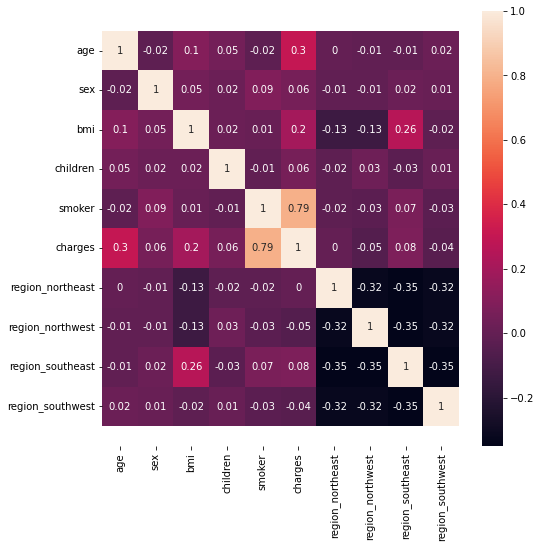

In [9]:
# выявляем корреляцию 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))

ax=sns.heatmap(round(data_train.corr(),2),annot=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [10]:
# выявляем корреляцию про charges и узнаем, что большую корреляцию имеет smoker-age-bmi 
# теперь запиcываем имена этих столбцов в important 
important=data_train.corr()["charges"].sort_values(ascending=False)[1:5].index.to_list()
print(important)
data_train.corr()["charges"].sort_values(ascending=False)

['smoker', 'age', 'bmi', 'region_southeast']


charges             1.000000
smoker              0.785957
age                 0.296395
bmi                 0.204654
region_southeast    0.079553
sex                 0.064249
children            0.059493
region_northeast    0.003448
region_southwest   -0.039458
region_northwest   -0.047099
Name: charges, dtype: float64

In [11]:
# определяем charges и записываем в отдельную переменную y_train
y_train=data_train["charges"]
data_train=data_train.drop(["charges"],axis=1)
data_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,34,1,42.900,1,0,0,0,0,1
1,61,0,36.385,1,1,1,0,0,0
2,60,1,25.740,0,0,0,0,1,0
3,44,0,29.810,2,0,0,0,1,0
4,40,0,29.600,0,0,0,0,0,1


In [12]:
# теперь определяем наши данные на тренировачный и тестовый набор
from sklearn.model_selection import train_test_split
train_data,val_data,train_y,val_y=train_test_split(data_train,y_train,test_size=0.2)

In [34]:
# при помощи линейной регрессии делаем прогноз
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_data[important],train_y)
y_pred= lr.predict(val_data[important])
#Сравнение моделей на основе метрик регрессии (score)-линейная регрессия
train_res=lr.score(train_data[important],train_y)
val_res=lr.score(val_data[important],val_y)
print(f"score train {round((train_res*100),1)}")
print(f"score valid {round((val_res*100),1)}")

score train 73.7
score valid 75.9


In [35]:
y_pred

array([ 1866.80338898, 10081.07276754,  4527.45547851, 34696.11304565,
       31805.51585572, 15359.31803593, 32051.71444195,  9687.30402606,
        8214.71964245,  4288.25201181, 16183.78423142, 27104.03718161,
       15041.22408596, 26686.83857814,  2641.14593368,  5011.31309164,
       28877.31730811,  1568.47358248,   429.01334637, 27828.79362587,
        7109.63197943,  3533.13398705, 11274.08186167,  4439.73254323,
       39549.25143463, 12010.53015601,  8194.04441574, 12236.39671641,
       24337.16746345, 27684.19450474, 29731.10097924, 29305.88039058,
        3754.81037142, 28885.10980164,  6011.35817931, 13149.74366126,
       12370.23438307, 37104.6789353 ,  7626.96210205, 27473.29474085,
        8700.17407678, 25452.96834591, 12143.81303314, 15021.33314043,
        3161.20035957, 13355.05077738,  5012.11046564, 34506.62455464,
       35382.19095835,  9760.19318646, 28009.10231761, 12464.82356264,
        8236.32526478, 29971.28307658, 11666.51153242, 11662.98985515,
      

In [14]:
#все те же шаги, только с тестовыми данными
data_test=pd.read_csv("test.csv")
data_test.head()

,age,sex,bmi,children,smoker,region,charges
0,57,female,31.160,0,yes,northwest,43578.93940
1,61,female,39.100,2,no,southwest,14235.07200
2,61,male,23.655,0,no,northeast,13129.60345
3,59,male,29.700,2,no,southeast,12925.88600
4,19,female,28.880,0,yes,northwest,17748.50620


In [15]:
# проверяем есть ли пустые значения 
data_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#определяем тип данных каждой ячейки
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       133 non-null    int64  
 1   sex       133 non-null    object 
 2   bmi       133 non-null    float64
 3   children  133 non-null    int64  
 4   smoker    133 non-null    object 
 5   region    133 non-null    object 
 6   charges   133 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.4+ KB


In [17]:
data_test["sex"]=data_test["sex"].astype('category')
data_test["sex"]=data_test["sex"].cat.codes
data_test.head()

,age,sex,bmi,children,smoker,region,charges
0,57,0,31.160,0,yes,northwest,43578.93940
1,61,0,39.100,2,no,southwest,14235.07200
2,61,1,23.655,0,no,northeast,13129.60345
3,59,1,29.700,2,no,southeast,12925.88600
4,19,0,28.880,0,yes,northwest,17748.50620


In [18]:
data_test["smoker"]=data_test["smoker"].astype('category')
data_test["smoker"]=data_test["smoker"].cat.codes
data_test.head()

,age,sex,bmi,children,smoker,region,charges
0,57,0,31.160,0,1,northwest,43578.93940
1,61,0,39.100,2,0,southwest,14235.07200
2,61,1,23.655,0,0,northeast,13129.60345
3,59,1,29.700,2,0,southeast,12925.88600
4,19,0,28.880,0,1,northwest,17748.50620


In [19]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       133 non-null    int64  
 1   sex       133 non-null    int8   
 2   bmi       133 non-null    float64
 3   children  133 non-null    int64  
 4   smoker    133 non-null    int8   
 5   region    133 non-null    object 
 6   charges   133 non-null    float64
dtypes: float64(2), int64(2), int8(2), object(1)
memory usage: 5.6+ KB


In [20]:
data_test["region"].describe()

count           133
unique            4
top       southwest
freq             35
Name: region, dtype: object

In [21]:
data_test=pd.get_dummies(data_test,columns=["region"])
data_test.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,57,0,31.160,0,1,43578.93940,0,1,0,0
1,61,0,39.100,2,0,14235.07200,0,0,0,1
2,61,1,23.655,0,0,13129.60345,1,0,0,0
3,59,1,29.700,2,0,12925.88600,0,0,1,0
4,19,0,28.880,0,1,17748.50620,0,1,0,0


In [22]:
y_test=data_test["charges"]
data_test=data_test.drop(["charges"],axis=1)
data_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,57,0,31.160,0,1,0,1,0,0
1,61,0,39.100,2,0,0,0,0,1
2,61,1,23.655,0,0,1,0,0,0
3,59,1,29.700,2,0,0,0,1,0
4,19,0,28.880,0,1,0,1,0,0


In [23]:
#Сравнение моделей на основе метрик регрессии (score)
test_res=lr.score(data_test[important],y_test)
print(f"score train {round((test_res*100),1)}")


score train 78.4
